# Process MIDI files
Since Thur. Nov. 11th, 2021

Will deal with songs as MIDI files, process them as 1D discrete pitch for each time slot


## Setup



In [1]:
import os
import glob

import pandas as pd
from mido import MidiFile
import pretty_midi
import librosa
from librosa import display
import matplotlib.pyplot as plt
import seaborn as sns
from icecream import ic

from data_path import *



from icecream import ic

from util import *
from util import MidoUtil as Mu, PrettyMidiUtil as Pmu


sns.set_style('darkgrid')
os.chdir(f'../../{DIR_DSET}')
!ls

dnm = 'MIDI_EG'
d_dset = config(f'{DIR_DSET}.{dnm}')
dir_nm = d_dset['dir_nm']
path = f'{PATH_BASE}/{DIR_DSET}/{dir_nm}'
mids = sorted(glob.iglob(f'{path}/{d_dset["fmt_midi"]}', recursive=True))
mid_eg = mids[2]
ic(mid_eg)



Allie-Chord-Embedding Lakh-MIDI-Dataset     MIDI-eg


ic| mid_eg: ('/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MIDI-eg/Ed '
             'Sheeran - Shape of You (Carlo Prato).mid')


'/Users/stefanh/Documents/UMich/Research/Music with NLP/datasets/MIDI-eg/Ed Sheeran - Shape of You (Carlo Prato).mid'

## mido



In [2]:
mid = MidiFile(mid_eg, clip=True)
mid.play()
# ic(mid)
# for track in mid.tracks:
#     ic(track)
ic(len(mid.tracks))

t = mid.tracks[0]
ic(t)
ic(mid.tracks[1])
ic(mid.tracks[2][:10])



    # ic([msg for msg in lst])
    # return [msg.tempo for msg in list(filter(bool, msgs.values()))] if msgs else [int(5e5)]  # Midi default (ms per tick, i.e. 120 BPM)

# set_tempos = get_msgs_by_type(t, 'set_tempo')
set_tempos = Mu.get_tempo_changes(mid)
ic(set_tempos)

ic| len(mid.tracks): 11
ic| t: MidiTrack([
         MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
         MetaMessage('end_of_track', time=0)])
ic| mid.tracks[1]: MidiTrack([
                     MetaMessage('set_tempo', tempo=625000, time=0),
                     MetaMessage('end_of_track', time=0)])
ic| mid.tracks[2][:10]: MidiTrack([
                          MetaMessage('track_name', name='Voice', time=0),
                          Message('control_change', channel=11, control=10, value=64, time=0),
                          Message('control_change', channel=11, control=7, value=100, time=0),
                          Message('pitchwheel', channel=11, pitch=0, time=0),
                          Message('control_change', channel=11, control=101, value=0, time=0),
                          Message('control_change', channel=11, control=100, value=0, time=0),
                          Message('control_change', ch

[625000]

# music 21


In [3]:
import music21

s = music21.corpus.parse('bach/bwv65.2.xml')
# s.show()  # Needd to have software installed, e.g. MuseScore
ic(s)

ic| s: <music21.stream.Score 0x1666de3d0>


<music21.stream.Score 0x1666de3d0>

# pretty_midi


In [16]:
pm = pretty_midi.PrettyMIDI(mid_eg)

def plot_piano_roll(pm_: pretty_midi.PrettyMIDI, start_pitch=None, end_pitch=None, fs=100):
    plt.figure(figsize=(16, 9))
    if start_pitch is None:
        pass
    librosa.display.specshow(
        pm_.get_piano_roll(fs)[start_pitch:end_pitch],
        hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
        fmin=pretty_midi.note_number_to_hz(start_pitch)
    )
    plt.title('Piano roll plot')


plot_piano_roll(pm, 10, 90)
# plot_piano_roll(pm)

ic(pm.instruments)
insts = [pretty_midi.program_to_instrument_name(i.program) for i in pm.instruments]
ic(insts)

ic([len(i.notes) for i in pm.instruments])


/usr/local/lib/python3.9/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(
ic| pr: array([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]])


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

<Figure size 1152x648 with 0 Axes>

### Instruments for MIDI


In [5]:
ic(list(map(pretty_midi.program_to_instrument_name, range(128))))


ic| list(map(pretty_midi.program_to_instrument_name, range(128))): ['Acoustic Grand Piano',
                                                                    'Bright Acoustic Piano',
                                                                    'Electric Grand Piano',
                                                                    'Honky-tonk Piano',
                                                                    'Electric Piano 1',
                                                                    'Electric Piano 2',
                                                                    'Harpsichord',
                                                                    'Clavinet',
                                                                    'Celesta',
                                                                    'Glockenspiel',
                                                                    'Music Box',
                                                    

['Acoustic Grand Piano',
 'Bright Acoustic Piano',
 'Electric Grand Piano',
 'Honky-tonk Piano',
 'Electric Piano 1',
 'Electric Piano 2',
 'Harpsichord',
 'Clavinet',
 'Celesta',
 'Glockenspiel',
 'Music Box',
 'Vibraphone',
 'Marimba',
 'Xylophone',
 'Tubular Bells',
 'Dulcimer',
 'Drawbar Organ',
 'Percussive Organ',
 'Rock Organ',
 'Church Organ',
 'Reed Organ',
 'Accordion',
 'Harmonica',
 'Tango Accordion',
 'Acoustic Guitar (nylon)',
 'Acoustic Guitar (steel)',
 'Electric Guitar (jazz)',
 'Electric Guitar (clean)',
 'Electric Guitar (muted)',
 'Overdriven Guitar',
 'Distortion Guitar',
 'Guitar Harmonics',
 'Acoustic Bass',
 'Electric Bass (finger)',
 'Electric Bass (pick)',
 'Fretless Bass',
 'Slap Bass 1',
 'Slap Bass 2',
 'Synth Bass 1',
 'Synth Bass 2',
 'Violin',
 'Viola',
 'Cello',
 'Contrabass',
 'Tremolo Strings',
 'Pizzicato Strings',
 'Orchestral Harp',
 'Timpani',
 'String Ensemble 1',
 'String Ensemble 2',
 'Synth Strings 1',
 'Synth Strings 2',
 'Choir Aahs',
 'Voic

### Get the note pitches


ic| len(notes): 256
    notes[:5]: [Note(start=7.875000, end=8.000000, pitch=73, velocity=100),
                Note(start=8.000000, end=8.208333, pitch=76, velocity=100),
                Note(start=8.250000, end=8.375000, pitch=76, velocity=100),
                Note(start=8.375000, end=8.500000, pitch=76, velocity=100),
                Note(start=8.500000, end=8.625000, pitch=76, velocity=100)]
ic| df:      pitch
        0       73
        1       76
        2       76
        3       76
        4       76
        ..     ...
        251     78
        252     76
        253     76
        254     78
        255     73
        
        [256 rows x 1 columns]


,pitch
0,73
1,76
2,76
3,76
4,76
...,...
251,78
252,76
253,76
254,78


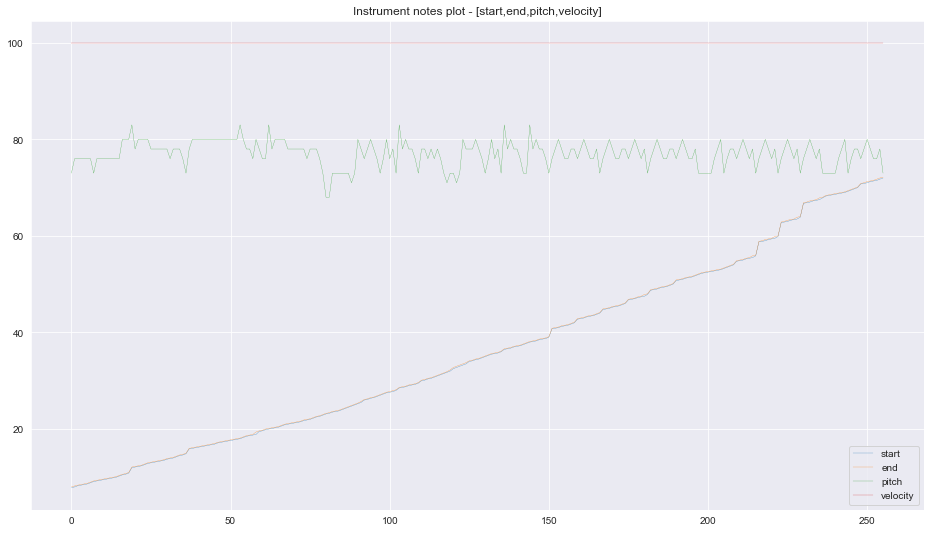

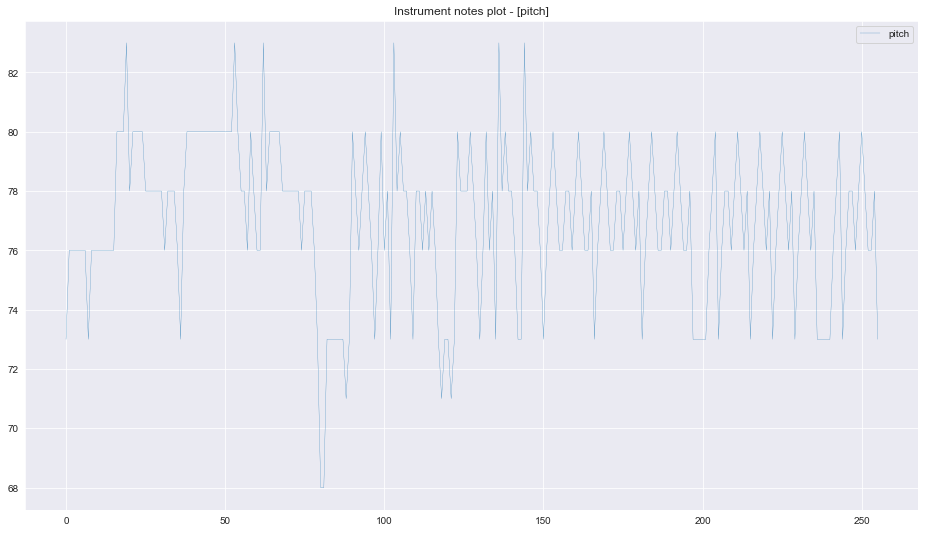

In [6]:
instr = pm.instruments[0]
notes = instr.notes
ic(len(notes), notes[:5])

df = Pmu.plot_single_instrument(instr)
df = Pmu.plot_single_instrument(instr, cols=['pitch'], n=256)
ic(df)


## How to break up the file into bars?
The physical time of notes should correspond to bars, given no tempo change


In [7]:
ic(pm.estimate_tempo())



ic| pm.estimate_tempo(): 232.54658385093225


232.54658385093225